In [1]:
import pandas as pd

df_vnx = pd.read_excel(r'D:\Downloads\DSTC vòng 3\cleaned data\UPCOM_cleaned.xlsx')
df_vnx.drop("Unnamed: 0", axis =1, inplace = True)
df_vnx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47872 entries, 0 to 47871
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ticker           47872 non-null  object 
 1   timestamp        47872 non-null  object 
 2   open             47872 non-null  float64
 3   high             47872 non-null  float64
 4   low              47872 non-null  float64
 5   close            47872 non-null  float64
 6   volume           47872 non-null  int64  
 7   ema_50           47872 non-null  float64
 8   ema_200          47872 non-null  float64
 9   macd             47872 non-null  float64
 10  macd_signal      47872 non-null  float64
 11  macd_diff        47872 non-null  float64
 12  rsi              47872 non-null  float64
 13  bollinger_hband  47872 non-null  float64
 14  bollinger_lband  47872 non-null  float64
 15  mfi              47872 non-null  float64
 16  golden_cross     47872 non-null  int64  
 17  death_cross 

In [2]:
df_vnx['min_price_in_future'] = df_vnx.groupby('ticker')['low'].shift(-10).rolling(window=10).min()
df_vnx['future_max_drawdown'] = (df_vnx['min_price_in_future'] / df_vnx['close']) - 1
df_vnx.dropna(subset=['future_max_drawdown'], inplace=True)


df_vnx['T2_drawdown'] = df_vnx.groupby('timestamp')['future_max_drawdown'].transform(lambda x: x.quantile(0.25))


In [3]:
print(df_vnx['future_max_drawdown'].describe(percentiles=[0.1, 0.25,0.3, 0.5, 0.7, 0.75, 0.9]))

count    46789.000000
mean        -0.064183
std          0.072618
min         -0.557473
10%         -0.154061
25%         -0.086559
30%         -0.072930
50%         -0.040927
70%         -0.021138
75%         -0.016937
90%         -0.004509
max          0.163968
Name: future_max_drawdown, dtype: float64


In [4]:
import numpy as np

# conditions = [
#     df_vnx['future_max_drawdown'] <= df_vnx['T1_drawdown'], 
#     (df_vnx['future_max_drawdown'] > df_vnx['T1_drawdown']) & (df_vnx['future_max_drawdown'] <= df_vnx['T2_drawdown']), 
#     df_vnx['future_max_drawdown'] > df_vnx['T2_drawdown'] 
# ]

# labels = [2,1,0] 


conditions = [
    df_vnx['future_max_drawdown'] <= df_vnx['T2_drawdown'],  
    df_vnx['future_max_drawdown'] > df_vnx['T2_drawdown'] 
]


labels = [1,0] 
df_vnx['risk_label'] = np.select(conditions, labels)

df_vnx.head()

,ticker,timestamp,open,high,low,close,volume,ema_50,ema_200,macd,...,golden_cross,death_cross,return,macd_cross,bollinger_pct,bollinger_bw,min_price_in_future,future_max_drawdown,T2_drawdown,risk_label
9,HSV,2022-04-04 00:00,11619.28,13333.60,11619.28,12940.2588,250600,12496.675915,12496.675915,167.804252,...,0,0,0.021579,0,0.798522,0.116633,11143.08,-0.138883,-0.201946,0
10,HSV,2022-04-05 00:00,12952.64,13238.36,12762.16,13041.2132,315400,12518.030318,12518.030318,185.178876,...,0,0,0.007802,0,0.848275,0.120520,9714.48,-0.255094,-0.242883,1
11,HSV,2022-04-06 00:00,13047.88,13238.36,12381.20,12762.1600,65300,12527.604031,12527.604031,174.420519,...,0,0,-0.021398,0,0.658806,0.121301,8762.08,-0.313433,-0.307566,1
12,HSV,2022-04-07 00:00,12762.16,12952.64,12381.20,12765.0172,56200,12536.914351,12536.914351,164.231833,...,0,0,0.000224,0,0.655718,0.122135,8762.08,-0.313587,-0.306623,1
13,HSV,2022-04-08 00:00,12857.40,12857.40,11809.76,12344.0564,44600,12529.351294,12529.351294,120.796738,...,0,0,-0.032978,-1,0.388239,0.122863,8762.08,-0.290178,-0.311146,0


In [5]:
df_vnx.dropna(axis = 0, how = 'any', inplace = True)
df_vnx.tail()

,ticker,timestamp,open,high,low,close,volume,ema_50,ema_200,macd,...,golden_cross,death_cross,return,macd_cross,bollinger_pct,bollinger_bw,min_price_in_future,future_max_drawdown,T2_drawdown,risk_label
47857,VGI,2025-08-19 00:00,76435.72,78217.90,75643.64,76464.4329,1057600,74632.205196,73404.067261,1278.580951,...,0,0,-0.007786,0,0.541346,0.149043,71980.27,-0.058644,-0.092158,0
47858,VGI,2025-08-20 00:00,77128.79,77227.80,72772.35,74827.7976,883600,74639.875487,73418.233732,990.104177,...,0,0,-0.021404,-1,0.389906,0.146846,71980.27,-0.038054,-0.084901,0
47859,VGI,2025-08-21 00:00,74356.51,74752.55,72772.35,73245.6178,755200,74585.198715,73416.516160,626.592598,...,0,0,-0.021144,0,0.254949,0.148750,71800.00,-0.019737,-0.090057,0
47860,VGI,2025-08-22 00:00,73267.40,74752.55,71980.27,72997.1027,688700,74522.920440,73412.342892,314.824856,...,0,0,-0.003393,0,0.251908,0.153012,69300.00,-0.050647,-0.067979,0
47861,VGI,2025-08-25 00:00,77227.80,77227.80,72079.28,72646.6073,285700,74449.339532,73404.723632,39.014886,...,0,0,-0.004801,0,0.247634,0.156391,69300.00,-0.046067,-0.071586,0


In [6]:
df_vnx["risk_label"].value_counts()

risk_label
0    34482
1    12307
Name: count, dtype: int64

In [7]:
df = df_vnx
df.reset_index(inplace = True)
df.drop("index", axis =1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46789 entries, 0 to 46788
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ticker               46789 non-null  object 
 1   timestamp            46789 non-null  object 
 2   open                 46789 non-null  float64
 3   high                 46789 non-null  float64
 4   low                  46789 non-null  float64
 5   close                46789 non-null  float64
 6   volume               46789 non-null  int64  
 7   ema_50               46789 non-null  float64
 8   ema_200              46789 non-null  float64
 9   macd                 46789 non-null  float64
 10  macd_signal          46789 non-null  float64
 11  macd_diff            46789 non-null  float64
 12  rsi                  46789 non-null  float64
 13  bollinger_hband      46789 non-null  float64
 14  bollinger_lband      46789 non-null  float64
 15  mfi                  46789 non-null 

In [8]:
import numpy as np
import pandas as pd

def add_features(df):
    df = df.copy()

    df["volatility_5d"] = df.groupby("ticker")["return"].rolling(5).std().reset_index(0, drop=True)
    df["volatility_10d"] = df.groupby("ticker")["return"].rolling(10).std().reset_index(0, drop=True)

    df["volume_change"] = df.groupby("ticker")["volume"].pct_change()
    
    df["obv"] = (np.sign(df["return"].fillna(0)) * df["volume"]).groupby(df["ticker"]).cumsum()
    
    df["volume_pct_20d"] = df.groupby("ticker")["volume"].transform(
        lambda x: x.rolling(20).apply(lambda s: pd.Series(s).rank(pct=True).iloc[-1])
    )

    lag_cols = ["close", "return", "rsi", "macd", "macd_diff", "bollinger_pct"]
    for col in lag_cols:
        for lag in [1, 2, 3]:
            df[f"{col}_lag{lag}"] = df.groupby("ticker")[col].shift(lag)
    
    return df

df = add_features(df)


df.dropna(inplace=True)

print("Số feature sau khi thêm:", df.shape[1])
df.head()


Số feature sau khi thêm: 49


,ticker,timestamp,open,high,low,close,volume,ema_50,ema_200,macd,...,rsi_lag3,macd_lag1,macd_lag2,macd_lag3,macd_diff_lag1,macd_diff_lag2,macd_diff_lag3,bollinger_pct_lag1,bollinger_pct_lag2,bollinger_pct_lag3
19,HSV,2022-05-04 00:00,9809.72,10000.20,9714.48,9884.0072,21900,11561.521956,11561.521956,-783.965935,...,23.187029,-816.379965,-859.065580,-871.282153,-190.322092,-280.588229,-362.951860,0.293997,0.223964,0.100355
20,HSV,2022-05-05 00:00,9904.96,10476.40,9619.24,10081.1540,13700,11503.468310,11503.468310,-733.909433,...,32.750951,-783.965935,-816.379965,-859.065580,-126.326449,-190.322092,-280.588229,0.294485,0.293997,0.223964
21,HSV,2022-05-06 00:00,10095.44,10095.44,9428.76,9613.5256,19300,11429.352910,11429.352910,-723.631425,...,37.123091,-733.909433,-783.965935,-816.379965,-61.015957,-126.326449,-190.322092,0.346537,0.294485,0.293997
22,HSV,2022-05-09 00:00,9428.76,9714.48,8857.32,9384.9496,20800,11349.180231,11349.180231,-725.566326,...,36.006301,-723.631425,-733.909433,-783.965935,-40.590360,-61.015957,-126.326449,0.288044,0.346537,0.294485
23,HSV,2022-05-10 00:00,9143.04,9524.00,9047.80,9333.5200,21000,11270.134732,11270.134732,-722.916358,...,39.013600,-725.566326,-723.631425,-733.909433,-34.020208,-40.590360,-61.015957,0.270330,0.288044,0.346537


In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import torch
import torch.nn as nn
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Features = [
       'open', 'high', 'low', 'close', 'volume',
       'ema_50', 'ema_200', 'macd', 'macd_signal', 'macd_diff', 'rsi',
       'bollinger_hband', 'bollinger_lband', 'mfi',
       'return', 'bollinger_pct', 'bollinger_bw',
       'volatility_5d', 'volatility_10d',
       'volume_change', 'obv', 'volume_pct_20d', 'close_lag1', 'close_lag2',
       'close_lag3', 'return_lag1', 'return_lag2', 'return_lag3', 'rsi_lag1',
       'rsi_lag2', 'rsi_lag3', 'macd_lag1', 'macd_lag2', 'macd_lag3',
       'macd_diff_lag1', 'macd_diff_lag2', 'macd_diff_lag3',
       'bollinger_pct_lag1', 'bollinger_pct_lag2', 'bollinger_pct_lag3'
]


# Features = [
#        'open', 'high', 'low', 'close', 'volume',
#        'ema_50', 'ema_200', 'macd', 'macd_signal', 'rsi',
#        'bollinger_hband', 'bollinger_lband', 'mfi', 'return', 'bollinger_pct', 'bollinger_bw'
#        ]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
import lightgbm as lgb

test_size = 0.2
random_state = 42
all_Xtrain_dfs = []
all_ytrain_dfs = []
all_Xtest_dfs = []
all_ytest_dfs = []

for ticker in df["ticker"].unique():
    df_ticker = df[df["ticker"] == ticker].copy()
    df_ticker.sort_values(by = "timestamp", inplace = True)
    split_index = int((len(df_ticker) * (1-test_size)))
    df_ticker_train = df_ticker[:split_index]
    df_ticker_test = df_ticker[split_index:]
    all_Xtrain_dfs.append(df_ticker_train[Features])
    all_Xtest_dfs.append(df_ticker_test[Features])
    all_ytrain_dfs.append(df_ticker_train["risk_label"])
    all_ytest_dfs.append(df_ticker_test["risk_label"])


X_train = pd.concat(all_Xtrain_dfs)
X_test = pd.concat(all_Xtest_dfs)
y_train = pd.concat(all_ytrain_dfs)
y_test = pd.concat(all_ytest_dfs)

print(f"Kích thước tập Train: X={X_train.shape}, y={y_train.shape}")
print(f"Kích thước tập Test: X={X_test.shape}, y={y_test.shape}")



Kích thước tập Train: X=(36531, 40), y=(36531,)
Kích thước tập Test: X=(9175, 40), y=(9175,)


In [11]:
!pip install imblearn

In [12]:

from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_train_smote, y_train_smote = smote_enn.fit_resample(X_train, y_train)


print(f"\nKích thước tập Train SAU KHI SMOTE: X={X_train_smote.shape}, y={y_train_smote.shape}")
print("\nPhân bổ lớp trên tập Train SAU KHI SMOTE:")
print(y_train_smote.value_counts(normalize=True))


Kích thước tập Train SAU KHI SMOTE: X=(27509, 40), y=(27509,)

Phân bổ lớp trên tập Train SAU KHI SMOTE:
risk_label
1    0.54873
0    0.45127
Name: proportion, dtype: float64


[LightGBM] [Info] Number of positive: 9610, number of negative: 26921
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9985
[LightGBM] [Info] Number of data points in the train set: 36531, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.263064 -> initscore=-1.030102
[LightGBM] [Info] Start training from score -1.030102
              precision    recall  f1-score   support

           0     0.7907    0.8113    0.8009      6763
           1     0.4293    0.3980    0.4131      2412

    accuracy                         0.7027      9175
   macro avg     0.6100    0.6047    0.6070      9175
weighted avg     0.6957    0.7027    0.6990      9175



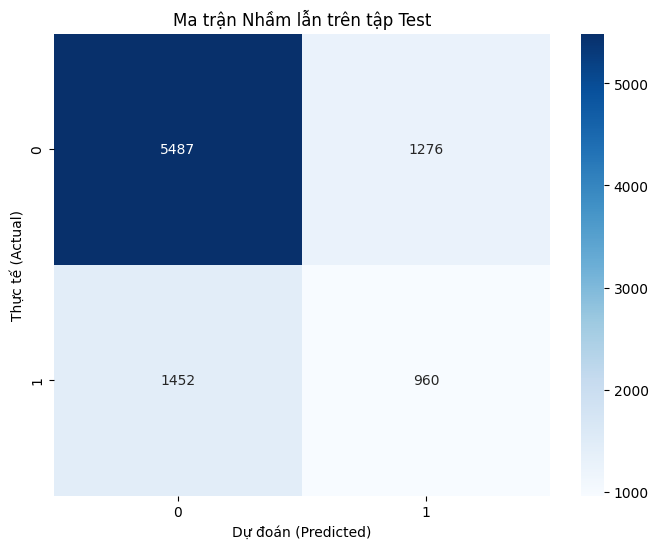

In [13]:
import lightgbm as lgb
from collections import Counter
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

lgbm_classifier = lgb.LGBMClassifier(random_state=42, is_unbalance=True)
# counter = Counter(y_train)
# neg_count = counter[0]
# pos_count = counter[1]


# scale_pos_weight_value = neg_count / pos_count

# print(f"Số mẫu lớp 0 (Không rủi ro cao): {neg_count}")
# print(f"Số mẫu lớp 1 (Rủi ro cao): {pos_count}")
# print(f"Giá trị scale_pos_weight được tính toán: {scale_pos_weight_value:.4f}")



lgbm_classifier_scaled = lgb.LGBMClassifier(random_state=42)


lgbm_classifier_scaled.fit(X_train, y_train)

model_filename = 'lgbm_model_upcom.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(lgbm_classifier_scaled, file)

y_pred_proba = lgbm_classifier_scaled.predict_proba(X_test)[:, 1]
y_pred_scaled = (y_pred_proba > 0.4).astype(int)


print(classification_report(y_test, y_pred_scaled, digits=4))
cm = confusion_matrix(y_test, y_pred_scaled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Dự đoán (Predicted)')
plt.ylabel('Thực tế (Actual)')
plt.title('Ma trận Nhầm lẫn trên tập Test')
plt.show()